In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import missingno as msno

In [4]:
# load data
file = (r"C:\Users\esnak\OneDrive\Desktop\coding_dojo\single cell\New folder\vesicles_plasma\vesicles_plasma.xlsx.csv")
df = pd.read_csv(file)
df

,Cluster,Original row,Protein IDs,Gene names_to_merge,top_100,Protein names,Gene names,C_1,C_10,C_11,...,SEC_29,PROSPR_1,PROSPR_2,PROSPR_3,CUC_2_1,CUC_2_2,CUC_2_3,DUC_1,DUC_2,DUC_3
0,C1,52,Q9Y5L4,TIMM13 TIM13B TIMM13A TIMM13B,0,Mitochondrial import inner membrane translocas...,TIMM13 TIM13B TIMM13A TIMM13B,NaN,NaN,NaN,...,NaN,0.11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C1,81,Q9Y478,PRKAB1 AMPK,0,5'-AMP-activated protein kinase subunit beta-1...,PRKAB1 AMPK,NaN,NaN,NaN,...,NaN,0.01000,0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C1,151,Q9Y262,EIF3L EIF3EIP EIF3S6IP HSPC021 HSPC025 MSTP005,0,Eukaryotic translation initiation factor 3 sub...,EIF3L EIF3EIP EIF3S6IP HSPC021 HSPC025 MSTP005,NaN,NaN,NaN,...,0.000237,0.00255,0.100000,NaN,NaN,0.000131,NaN,NaN,NaN,NaN
3,C1,167,Q9UPW8,UNC13A KIAA1032,0,Protein unc-13 homolog A (Munc13-1),UNC13A KIAA1032,NaN,NaN,NaN,...,NaN,NaN,0.000654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1,257,Q9UJ41,RABGEF1 RABEX5,0,Rab5 GDP/GTP exchange factor (RAP1) (Rabaptin-...,RABGEF1 RABEX5,NaN,NaN,NaN,...,NaN,0.01000,0.008570,0.000045,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,C15,1022,Q92835,INPP5D SHIP SHIP1,0,"Phosphatidylinositol 3,4,5-trisphosphate 5-pho...",INPP5D SHIP SHIP1,NaN,NaN,NaN,...,0.000125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4607,C15,2810,P31944,CASP14,0,Caspase-14 (CASP-14) (EC 3.4.22.-) [Cleaved in...,CASP14,NaN,NaN,NaN,...,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4608,C15,3251,P12110,COL6A2,0,Collagen alpha-2(VI) chain,COL6A2,NaN,NaN,NaN,...,0.070000,0.00110,0.003440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4609,C15,3731,O95833,CLIC3,0,Chloride intracellular channel protein 3,CLIC3,NaN,NaN,NaN,...,0.001440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# check duplicated

In [5]:
df.duplicated().sum()

0

# check missing values

In [6]:
df.isna().sum().sum()

381642

In [7]:
df.isna().sum()/len(df)*100

Cluster                 0.000000
Original row            0.000000
Protein IDs             0.000000
Gene names_to_merge     0.216873
top_100                 0.000000
                         ...    
CUC_2_2                92.301019
CUC_2_3                91.064845
DUC_1                  95.554110
DUC_2                  95.510735
DUC_3                  95.510735
Length: 112, dtype: float64

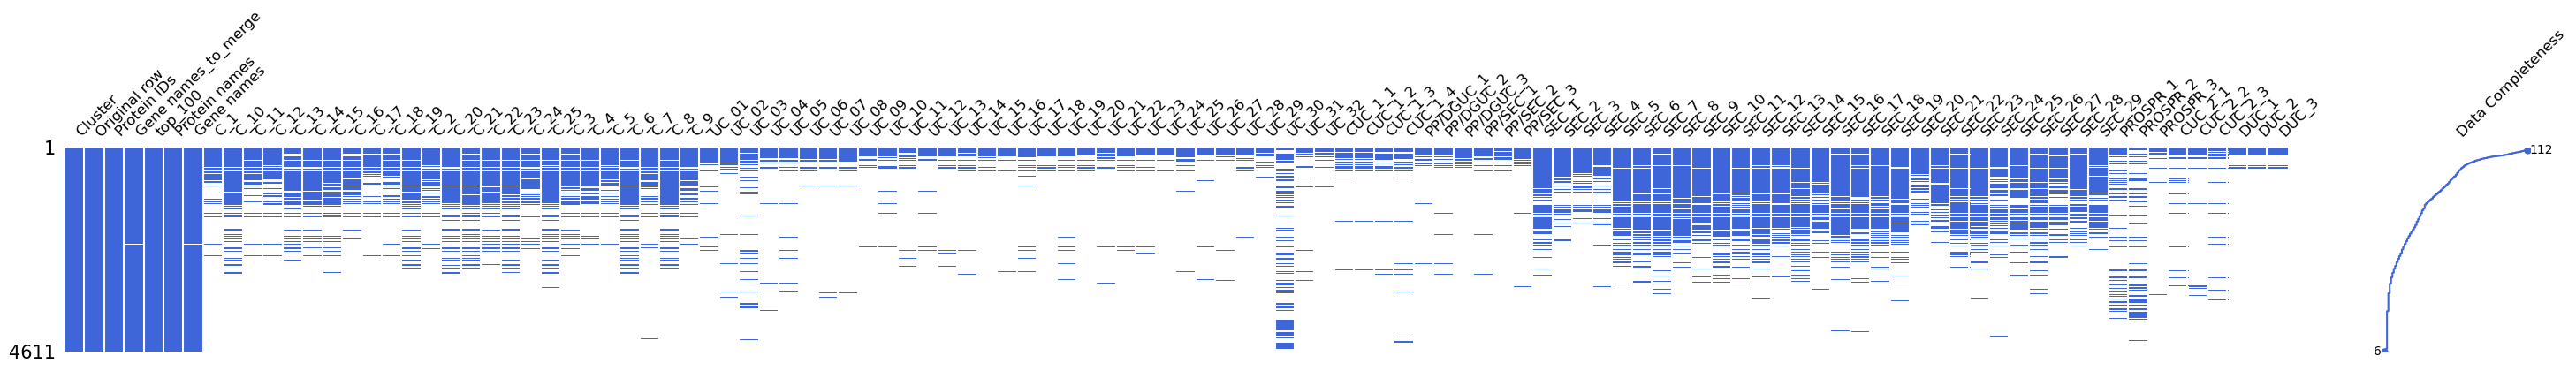

In [8]:
# check the missing values
msno.matrix(df, figsize=(36,3), labels=True, fontsize=12, sort="descending", color=	(.25,.4,.85));

# DROP missing values 

In [9]:
# drop missing values
df_no_NAN = df.dropna()

In [10]:
# check missing values
df_no_NAN.isna().sum().sum()

0

In [11]:
df_no_NAN.shape
# only 51 protein with no missing values


(51, 112)

In [12]:
df_no_NAN

,Cluster,Original row,Protein IDs,Gene names_to_merge,top_100,Protein names,Gene names,C_1,C_10,C_11,...,SEC_29,PROSPR_1,PROSPR_2,PROSPR_3,CUC_2_1,CUC_2_2,CUC_2_3,DUC_1,DUC_2,DUC_3
786,C2,3627,P01857,IGHG1,0,Immunoglobulin heavy constant gamma 1 (Ig gamm...,IGHG1,6.77,3.74000,7.05000,...,0.570000,0.120000,0.410000,4.450000,2.11,1.86,1.77,6.09000,6.44000,5.95000
1054,C3,3674,P01042,KNG1 BDK KNG,0,Kininogen-1 (Alpha-2-thiol proteinase inhibito...,KNG1 BDK KNG,0.09,0.03000,0.08000,...,0.040000,0.010000,0.001180,0.080000,0.03,0.05,0.08,0.00908,0.00981,0.00850
1119,C4,3609,P02647,APOA1,0,Apolipoprotein A-I (Apo-AI) (ApoA-I) (Apolipop...,APOA1,4.05,1.56000,2.77000,...,3.860000,0.590000,0.280000,2.690000,2.50,4.21,1.34,1.07000,0.94000,0.95000
1165,C4,2915,P27169,PON1 PON,0,Serum paraoxonase/arylesterase 1 (PON 1) (EC 3...,PON1 PON,0.06,0.02000,0.03000,...,0.100000,0.030000,0.003590,0.050000,0.04,0.10,0.08,0.00431,0.00769,0.00583
1171,C4,3293,P10909,CLU APOJ CLI KUB1 AAG4,0,Clusterin (Aging-associated gene 4 protein) (A...,CLU APOJ CLI KUB1 AAG4,0.16,0.11000,0.13000,...,0.480000,0.002280,0.010000,0.120000,0.39,0.53,0.16,0.05000,0.04000,0.06000
1175,C4,3384,P08697,SERPINF2 AAP PLI,0,Alpha-2-antiplasmin (Alpha-2-AP) (Alpha-2-plas...,SERPINF2 AAP PLI,0.10,0.03000,0.07000,...,0.010000,0.090000,0.003610,0.070000,0.04,0.04,0.02,0.00558,0.00395,0.00440
1179,C4,3471,P06727,APOA4,0,Apolipoprotein A-IV (Apo-AIV) (ApoA-IV) (Apoli...,APOA4,0.23,0.13000,0.14000,...,0.180000,0.110000,0.008340,0.240000,0.08,0.30,0.15,0.00481,0.00481,0.00372
1183,C4,3564,P04004,VTN,0,Vitronectin (VN) (S-protein) (Serum-spreading ...,VTN,0.11,0.07000,0.10000,...,0.040000,0.002860,0.000213,0.020000,0.18,0.64,0.38,0.01000,0.01000,0.01000
1217,C5,3581,P02774,GC,0,Vitamin D-binding protein (DBP) (VDB) (Gc prot...,GC,0.57,0.19000,0.48000,...,0.010000,0.010000,0.030000,0.140000,0.22,0.54,0.64,0.02000,0.02000,0.02000
1218,C5,3582,P02768,ALB,1,Albumin,ALB GIG20 GIG42 PRO0903 PRO1708 PRO2044 PRO261...,35.80,19.70000,30.80000,...,4.410000,8.670000,1.010000,41.400000,24.80,17.50,30.00,5.81000,6.20000,6.33000


# drop unnecessary columns

In [13]:
df_copy = df_no_NAN.drop(columns = ['Cluster', 'Original row', 'Protein IDs', 'Gene names_to_merge', 'top_100', 'Protein names', 'Gene names'])
df_copy

,C_1,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,...,SEC_29,PROSPR_1,PROSPR_2,PROSPR_3,CUC_2_1,CUC_2_2,CUC_2_3,DUC_1,DUC_2,DUC_3
786,6.77,3.74000,7.05000,6.69000,5.42000,3.42000,5.16000,3.79000,7.97000,5.24000,...,0.570000,0.120000,0.410000,4.450000,2.11,1.86,1.77,6.09000,6.44000,5.95000
1054,0.09,0.03000,0.08000,0.09000,0.07000,0.06000,0.09000,0.04000,0.07000,0.08000,...,0.040000,0.010000,0.001180,0.080000,0.03,0.05,0.08,0.00908,0.00981,0.00850
1119,4.05,1.56000,2.77000,4.57000,2.46000,3.54000,2.96000,2.37000,3.35000,3.08000,...,3.860000,0.590000,0.280000,2.690000,2.50,4.21,1.34,1.07000,0.94000,0.95000
1165,0.06,0.02000,0.03000,0.11000,0.06000,0.08000,0.08000,0.09000,0.07000,0.10000,...,0.100000,0.030000,0.003590,0.050000,0.04,0.10,0.08,0.00431,0.00769,0.00583
1171,0.16,0.11000,0.13000,0.14000,0.10000,0.23000,0.14000,0.22000,0.11000,0.20000,...,0.480000,0.002280,0.010000,0.120000,0.39,0.53,0.16,0.05000,0.04000,0.06000
1175,0.10,0.03000,0.07000,0.10000,0.06000,0.05000,0.07000,0.04000,0.08000,0.07000,...,0.010000,0.090000,0.003610,0.070000,0.04,0.04,0.02,0.00558,0.00395,0.00440
1179,0.23,0.13000,0.14000,0.23000,0.12000,0.25000,0.13000,0.22000,0.11000,0.37000,...,0.180000,0.110000,0.008340,0.240000,0.08,0.30,0.15,0.00481,0.00481,0.00372
1183,0.11,0.07000,0.10000,0.12000,0.09000,0.08000,0.09000,0.06000,0.10000,0.09000,...,0.040000,0.002860,0.000213,0.020000,0.18,0.64,0.38,0.01000,0.01000,0.01000
1217,0.57,0.19000,0.48000,0.45000,0.32000,0.29000,0.40000,0.27000,0.43000,0.38000,...,0.010000,0.010000,0.030000,0.140000,0.22,0.54,0.64,0.02000,0.02000,0.02000
1218,35.80,19.70000,30.80000,33.20000,31.20000,27.10000,28.60000,29.80000,34.20000,29.20000,...,4.410000,8.670000,1.010000,41.400000,24.80,17.50,30.00,5.81000,6.20000,6.33000


# df_transposed

In [14]:
df_copy_transposed = df_copy.T
df_copy_transposed

,786,1054,1119,1165,1171,1175,1179,1183,1217,1218,...,4373,4374,4410,4450,4483,4485,4492,4493,4513,4515
C_1,6.77,0.09000,4.05,0.06000,0.16,0.10000,0.23000,0.11,0.57,35.80,...,0.31,0.19,0.01000,0.07000,0.05000,0.26,0.06,0.02,0.03,0.23
C_10,3.74,0.03000,1.56,0.02000,0.11,0.03000,0.13000,0.07,0.19,19.70,...,0.13,0.07,0.00289,0.07000,0.02000,0.55,0.07,0.05,0.01,0.16
C_11,7.05,0.08000,2.77,0.03000,0.13,0.07000,0.14000,0.10,0.48,30.80,...,0.32,0.06,0.00911,0.05000,0.04000,0.49,0.13,0.05,0.05,0.44
C_12,6.69,0.09000,4.57,0.11000,0.14,0.10000,0.23000,0.12,0.45,33.20,...,0.25,0.10,0.00861,0.06000,0.07000,0.26,0.05,0.02,0.04,0.23
C_13,5.42,0.07000,2.46,0.06000,0.10,0.06000,0.12000,0.09,0.32,31.20,...,0.24,0.04,0.00762,0.02000,0.04000,0.39,0.05,0.03,0.01,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUC_2_2,1.86,0.05000,4.21,0.10000,0.53,0.04000,0.30000,0.64,0.54,17.50,...,1.28,0.94,0.16000,0.44000,0.04000,6.96,0.21,0.55,0.04,0.57
CUC_2_3,1.77,0.08000,1.34,0.08000,0.16,0.02000,0.15000,0.38,0.64,30.00,...,0.89,0.45,0.03000,0.22000,0.01000,2.03,3.08,0.70,0.01,0.58
DUC_1,6.09,0.00908,1.07,0.00431,0.05,0.00558,0.00481,0.01,0.02,5.81,...,0.70,0.20,0.03000,0.00737,0.00211,11.70,1.10,2.48,0.39,1.15
DUC_2,6.44,0.00981,0.94,0.00769,0.04,0.00395,0.00481,0.01,0.02,6.20,...,0.72,0.19,0.03000,0.00651,0.00229,11.50,1.26,2.21,0.58,1.70


In [15]:
name_sample = df_copy_transposed.index
name_sample

Index(['C_1', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16', 'C_17',
       'C_18',
       ...
       'SEC_29', 'PROSPR_1', 'PROSPR_2', 'PROSPR_3', 'CUC_2_1', 'CUC_2_2',
       'CUC_2_3', 'DUC_1', 'DUC_2', 'DUC_3'],
      dtype='object', length=105)

In [16]:
df_copy_transposed.describe()

,786,1054,1119,1165,1171,1175,1179,1183,1217,1218,...,4373,4374,4410,4450,4483,4485,4492,4493,4513,4515
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2.915238,0.061024,3.085238,0.088565,0.298879,0.033283,0.154638,0.119363,0.197429,16.436857,...,0.464952,0.602952,0.022590,0.501217,0.312505,3.802952,0.642602,0.736393,0.149542,0.583252
std,2.059590,0.057027,3.658123,0.135380,0.475887,0.037259,0.118013,0.151839,0.188685,10.180167,...,0.414627,0.585010,0.027975,0.809981,0.518302,3.498448,0.664576,0.827667,0.185054,0.587511
min,0.040000,0.000613,0.280000,0.003590,0.002280,0.000418,0.003720,0.000213,0.010000,0.210000,...,0.010000,0.010000,0.000340,0.003160,0.000836,0.030000,0.000210,0.000525,0.000742,0.005880
25%,0.790000,0.030000,1.710000,0.030000,0.120000,0.010000,0.080000,0.050000,0.060000,7.450000,...,0.110000,0.150000,0.003910,0.030000,0.020000,0.550000,0.080000,0.050000,0.030000,0.130000
50%,2.790000,0.050000,2.410000,0.050000,0.160000,0.020000,0.130000,0.080000,0.150000,14.800000,...,0.260000,0.360000,0.009500,0.090000,0.050000,2.640000,0.350000,0.300000,0.070000,0.270000
75%,4.240000,0.080000,3.230000,0.090000,0.270000,0.040000,0.210000,0.120000,0.290000,23.200000,...,0.790000,0.990000,0.030000,0.710000,0.480000,6.810000,1.100000,1.330000,0.200000,1.000000
max,7.970000,0.330000,25.300000,0.750000,3.950000,0.230000,0.850000,0.940000,1.010000,44.000000,...,1.540000,2.320000,0.160000,5.040000,2.830000,12.100000,3.080000,2.910000,0.890000,2.220000


In [17]:
# Save X data
X = df_copy_transposed
# Encode our target
le = LabelEncoder()
y = le.fit_transform(name_sample)
y


array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104,   0,   1,   2,   3,  35,  36,  37,  38,
        39,  40,  44,  55,  66,  67,  68,  69,  70,  71,  72,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  41,  42,  43,   4,   5,   6,  32,  33,
        34])

In [18]:
X.shape

(105, 51)

In [19]:
np.unique(y, axis=0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104])

#  Scaler df

In [20]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

scaled_df

array([[ 1.88059304,  0.51055534,  0.26499631, ..., -0.86970872,
        -0.64908237, -0.60415314],
       [ 0.40237025, -0.54662812, -0.4189453 , ..., -0.8332884 ,
        -0.75767722, -0.72387138],
       [ 2.01719448,  0.3343581 , -0.08658813, ..., -0.8332884 ,
        -0.54048752, -0.24499841],
       ...,
       [ 1.54884667, -0.91523276, -0.55353622, ...,  2.11675785,
         1.3056249 ,  0.96928661],
       [ 1.71959847, -0.90237036, -0.58924402, ...,  1.78897493,
         2.33727596,  1.90992994],
       [ 1.48054594, -0.9254522 , -0.58649726, ...,  2.08033752,
         1.52281459,  1.29423613]])

In [21]:
scaled_df.max()

9.817253178433484

In [22]:
scaled_df.min()

-1.7977663794313319

# Instantiate, fit & transform data using PCA

In [23]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)


In [24]:
pcs

array([[ 7.79200832e-01,  5.84377589e+00],
       [-2.91601876e+00,  1.52754096e+00],
       [ 7.04606040e-01,  4.29729924e+00],
       [ 1.11972320e-01,  5.04953324e+00],
       [-1.00514638e+00,  3.69776673e+00],
       [-2.43253697e+00,  2.73018440e+00],
       [-8.71549860e-02,  4.26960284e+00],
       [-3.10518046e+00,  2.13944869e+00],
       [ 4.00012434e-01,  3.81292556e+00],
       [ 6.99556795e-03,  3.94502823e+00],
       [-1.97012006e+00,  2.69304245e+00],
       [ 1.69772734e+00,  5.50827935e+00],
       [-3.28033716e+00,  1.37758346e+00],
       [-1.68123448e+00,  2.86814719e+00],
       [-8.94344581e-01,  3.43565557e+00],
       [-2.63959737e+00,  2.17560808e+00],
       [-2.95536204e+00,  1.59141808e+00],
       [-3.60547865e+00,  1.23564460e+00],
       [ 7.25667362e-01,  5.43667136e+00],
       [-7.73263076e-01,  4.25859093e+00],
       [-1.06783151e+00,  3.96955586e+00],
       [-2.83401166e+00,  1.58291876e+00],
       [ 2.35995462e+00,  6.31089192e+00],
       [-2.

In [25]:
pcs_df = pd.DataFrame(pcs, columns = ['1', '2'])
pcs_df

,1,2
0,0.779201,5.843776
1,-2.916019,1.527541
2,0.704606,4.297299
3,0.111972,5.049533
4,-1.005146,3.697767
...,...,...
100,8.951825,6.038123
101,5.656594,2.787328
102,4.601635,-6.021489
103,5.167448,-6.246166


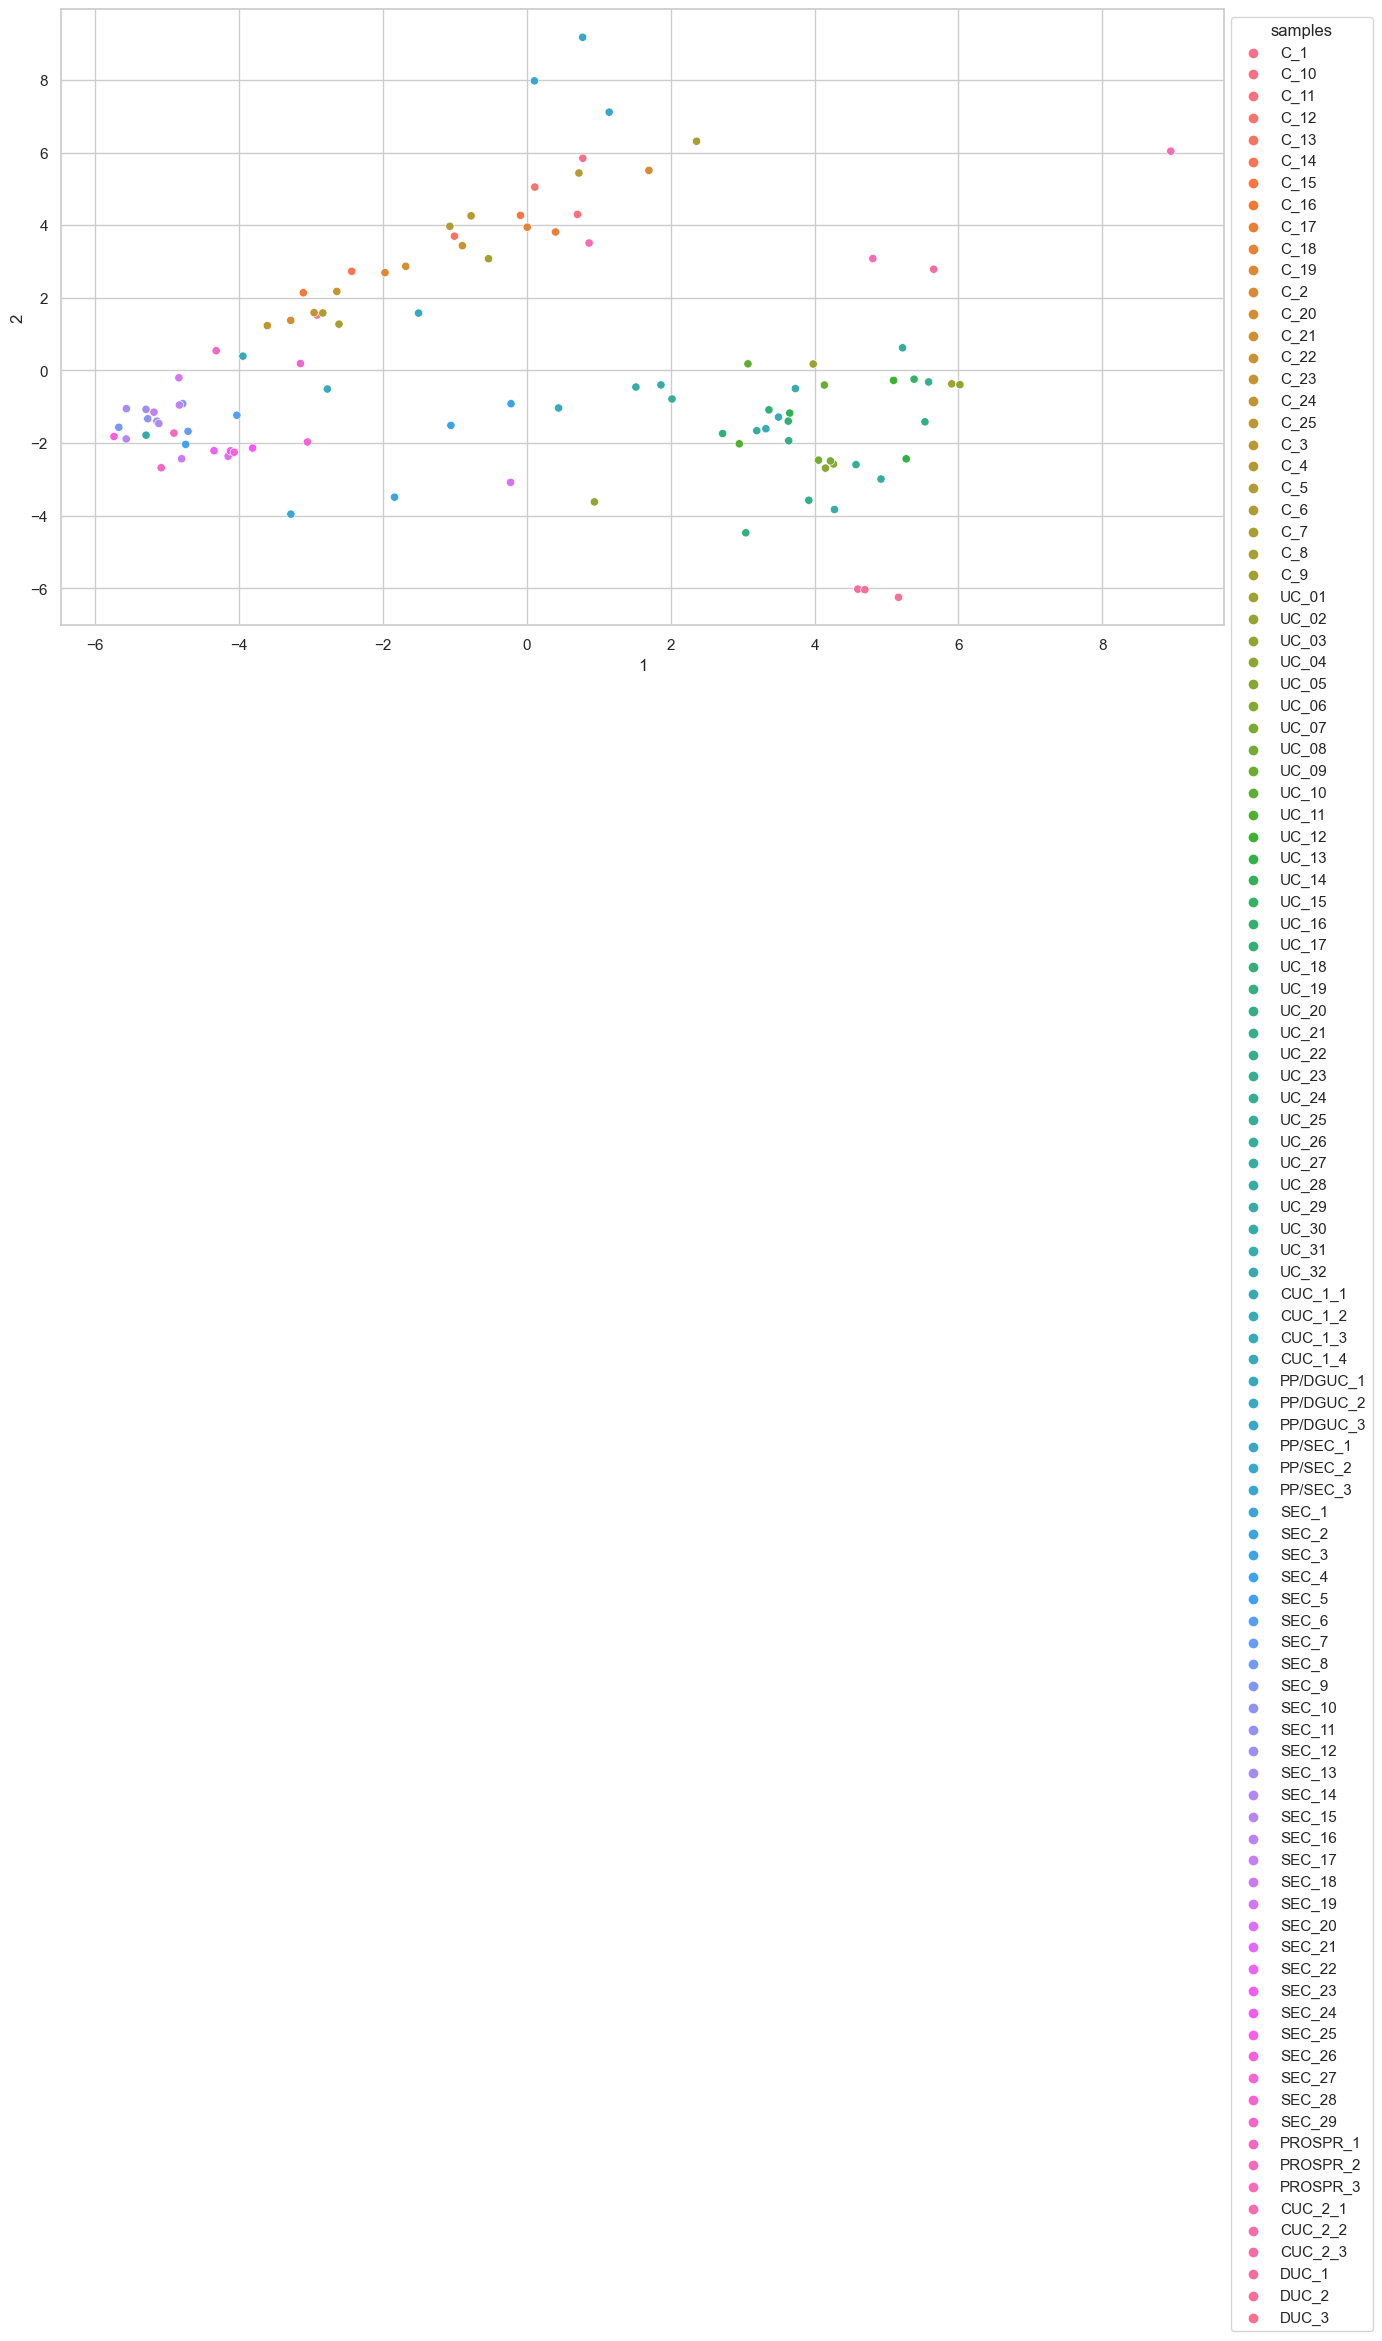

In [26]:
plt.figure(figsize=(15,8))
import seaborn
seaborn.set(style='whitegrid')


seaborn.scatterplot(x="1",
                    y="2",
                    data=pcs_df, hue= name_sample)

plt.legend(bbox_to_anchor=(1,1), title = 'samples')
plt.show()

In [27]:
colors = np.array(name_sample)
colors

array(['C_1', 'C_10', 'C_11', 'C_12', 'C_13', 'C_14', 'C_15', 'C_16',
       'C_17', 'C_18', 'C_19', 'C_2', 'C_20', 'C_21', 'C_22', 'C_23',
       'C_24', 'C_25', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9',
       'UC_01', 'UC_02', 'UC_03', 'UC_04', 'UC_05', 'UC_06', 'UC_07',
       'UC_08', 'UC_09', 'UC_10', 'UC_11', 'UC_12', 'UC_13', 'UC_14',
       'UC_15', 'UC_16', 'UC_17', 'UC_18', 'UC_19', 'UC_20', 'UC_21',
       'UC_22', 'UC_23', 'UC_24', 'UC_25', 'UC_26', 'UC_27', 'UC_28',
       'UC_29', 'UC_30', 'UC_31', 'UC_32', 'CUC_1_1', 'CUC_1_2',
       'CUC_1_3', 'CUC_1_4', 'PP/DGUC_1', 'PP/DGUC_2', 'PP/DGUC_3',
       'PP/SEC_1', 'PP/SEC_2', 'PP/SEC_3', 'SEC_1', 'SEC_2', 'SEC_3',
       'SEC_4', 'SEC_5', 'SEC_6', 'SEC_7', 'SEC_8', 'SEC_9', 'SEC_10',
       'SEC_11', 'SEC_12', 'SEC_13', 'SEC_14', 'SEC_15', 'SEC_16',
       'SEC_17', 'SEC_18', 'SEC_19', 'SEC_20', 'SEC_21', 'SEC_22',
       'SEC_23', 'SEC_24', 'SEC_25', 'SEC_26', 'SEC_27', 'SEC_28',
       'SEC_29', 'PROSPR_1', 'PRO

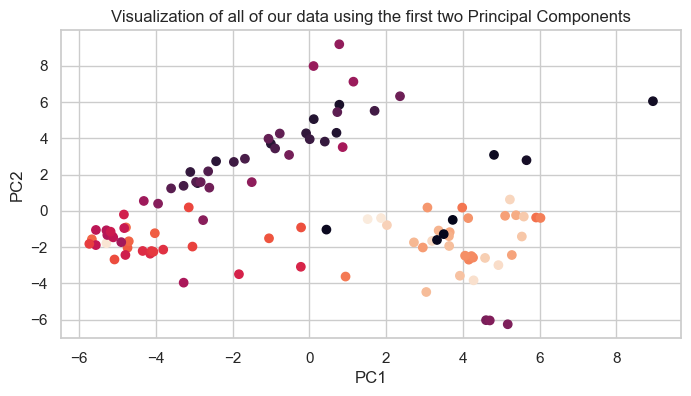

In [28]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
colors = np.array(name_sample)
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA(n_components = 3)

In [29]:
pca = PCA(n_components = 3)
pcs = pca.fit_transform(scaled_df)
pcs

array([[ 7.79200832e-01,  5.84377589e+00, -9.47121602e-01],
       [-2.91601876e+00,  1.52754096e+00, -2.12885986e+00],
       [ 7.04606040e-01,  4.29729924e+00, -1.86197298e+00],
       [ 1.11972320e-01,  5.04953324e+00, -7.20340577e-01],
       [-1.00514638e+00,  3.69776673e+00, -1.77718722e+00],
       [-2.43253697e+00,  2.73018440e+00, -1.14293434e+00],
       [-8.71549860e-02,  4.26960284e+00, -1.60357842e+00],
       [-3.10518046e+00,  2.13944869e+00, -1.52342755e+00],
       [ 4.00012434e-01,  3.81292556e+00, -1.60661334e+00],
       [ 6.99556795e-03,  3.94502823e+00, -9.58925708e-01],
       [-1.97012006e+00,  2.69304245e+00, -1.85211977e+00],
       [ 1.69772734e+00,  5.50827935e+00, -1.06957893e+00],
       [-3.28033716e+00,  1.37758346e+00, -1.80430522e+00],
       [-1.68123448e+00,  2.86814719e+00, -1.99449383e+00],
       [-8.94344581e-01,  3.43565557e+00, -1.70698239e+00],
       [-2.63959737e+00,  2.17560808e+00, -2.10739541e+00],
       [-2.95536204e+00,  1.59141808e+00

Text(0.5, 0.92, 'Visualization of all of our data using the three Principal Components')

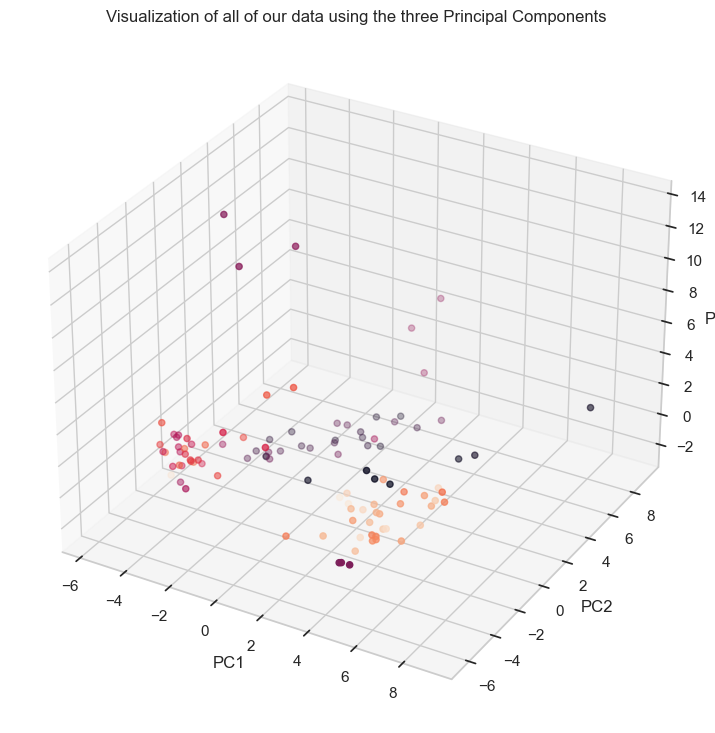

In [30]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12, 9)) # This establishes the size of the graph (try changing  the numbers to see the result)
ax = plt.axes(projection = "3d")
ax.scatter3D(xs=pcs[:,0], ys=pcs[:,1], zs=pcs[:,2], c = y)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Visualization of all of our data using the three Principal Components")

# rename samples

In [31]:
df_copy_transposed

,786,1054,1119,1165,1171,1175,1179,1183,1217,1218,...,4373,4374,4410,4450,4483,4485,4492,4493,4513,4515
C_1,6.77,0.09000,4.05,0.06000,0.16,0.10000,0.23000,0.11,0.57,35.80,...,0.31,0.19,0.01000,0.07000,0.05000,0.26,0.06,0.02,0.03,0.23
C_10,3.74,0.03000,1.56,0.02000,0.11,0.03000,0.13000,0.07,0.19,19.70,...,0.13,0.07,0.00289,0.07000,0.02000,0.55,0.07,0.05,0.01,0.16
C_11,7.05,0.08000,2.77,0.03000,0.13,0.07000,0.14000,0.10,0.48,30.80,...,0.32,0.06,0.00911,0.05000,0.04000,0.49,0.13,0.05,0.05,0.44
C_12,6.69,0.09000,4.57,0.11000,0.14,0.10000,0.23000,0.12,0.45,33.20,...,0.25,0.10,0.00861,0.06000,0.07000,0.26,0.05,0.02,0.04,0.23
C_13,5.42,0.07000,2.46,0.06000,0.10,0.06000,0.12000,0.09,0.32,31.20,...,0.24,0.04,0.00762,0.02000,0.04000,0.39,0.05,0.03,0.01,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUC_2_2,1.86,0.05000,4.21,0.10000,0.53,0.04000,0.30000,0.64,0.54,17.50,...,1.28,0.94,0.16000,0.44000,0.04000,6.96,0.21,0.55,0.04,0.57
CUC_2_3,1.77,0.08000,1.34,0.08000,0.16,0.02000,0.15000,0.38,0.64,30.00,...,0.89,0.45,0.03000,0.22000,0.01000,2.03,3.08,0.70,0.01,0.58
DUC_1,6.09,0.00908,1.07,0.00431,0.05,0.00558,0.00481,0.01,0.02,5.81,...,0.70,0.20,0.03000,0.00737,0.00211,11.70,1.10,2.48,0.39,1.15
DUC_2,6.44,0.00981,0.94,0.00769,0.04,0.00395,0.00481,0.01,0.02,6.20,...,0.72,0.19,0.03000,0.00651,0.00229,11.50,1.26,2.21,0.58,1.70


In [32]:
# make a new column with sample name
df_join_sample = df_copy_transposed.reset_index()
df_join_sample

,index,786,1054,1119,1165,1171,1175,1179,1183,1217,...,4373,4374,4410,4450,4483,4485,4492,4493,4513,4515
0,C_1,6.77,0.09000,4.05,0.06000,0.16,0.10000,0.23000,0.11,0.57,...,0.31,0.19,0.01000,0.07000,0.05000,0.26,0.06,0.02,0.03,0.23
1,C_10,3.74,0.03000,1.56,0.02000,0.11,0.03000,0.13000,0.07,0.19,...,0.13,0.07,0.00289,0.07000,0.02000,0.55,0.07,0.05,0.01,0.16
2,C_11,7.05,0.08000,2.77,0.03000,0.13,0.07000,0.14000,0.10,0.48,...,0.32,0.06,0.00911,0.05000,0.04000,0.49,0.13,0.05,0.05,0.44
3,C_12,6.69,0.09000,4.57,0.11000,0.14,0.10000,0.23000,0.12,0.45,...,0.25,0.10,0.00861,0.06000,0.07000,0.26,0.05,0.02,0.04,0.23
4,C_13,5.42,0.07000,2.46,0.06000,0.10,0.06000,0.12000,0.09,0.32,...,0.24,0.04,0.00762,0.02000,0.04000,0.39,0.05,0.03,0.01,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,CUC_2_2,1.86,0.05000,4.21,0.10000,0.53,0.04000,0.30000,0.64,0.54,...,1.28,0.94,0.16000,0.44000,0.04000,6.96,0.21,0.55,0.04,0.57
101,CUC_2_3,1.77,0.08000,1.34,0.08000,0.16,0.02000,0.15000,0.38,0.64,...,0.89,0.45,0.03000,0.22000,0.01000,2.03,3.08,0.70,0.01,0.58
102,DUC_1,6.09,0.00908,1.07,0.00431,0.05,0.00558,0.00481,0.01,0.02,...,0.70,0.20,0.03000,0.00737,0.00211,11.70,1.10,2.48,0.39,1.15
103,DUC_2,6.44,0.00981,0.94,0.00769,0.04,0.00395,0.00481,0.01,0.02,...,0.72,0.19,0.03000,0.00651,0.00229,11.50,1.26,2.21,0.58,1.70


In [33]:
df_join_sample['index']

0          C_1
1         C_10
2         C_11
3         C_12
4         C_13
        ...   
100    CUC_2_2
101    CUC_2_3
102      DUC_1
103      DUC_2
104      DUC_3
Name: index, Length: 105, dtype: object

In [34]:
# rename sample with RegEx 
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^C_+\d*', value = 'Centrifugation', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^SEC_+\d*', value = 'Size exclusion chromatography', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^DUC_+\d*', value = 'Dilution followed by ultracentrifugation', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^UC_+\d*', value = 'Ultracentrifugation', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^PP/SEC_+\d*', value = 'Polymer-based precipitation/Size exclusion chromatography', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^CUC_2_+\d*', value = 'Cushion ultracentrifugation_2', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^PROSPR_+\d*', value = 'PRotein Organic Solvent PRecipitation', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^CUC_1_+\d*', value = 'Cushion ultracentrifugation_1', regex = True)
df_join_sample['join samples'] = df_join_sample['index'].replace(to_replace ='^PP/DGUC_+\d*', value = 'Polymer-based precipitation /Density gradient ultracentrifugation', regex = True)

In [35]:
# make a dict and rename samples 
df_join_sample['join samples'] = df_join_sample['index'].replace({'^C_+\d*': 'Centrifugation', '^SEC_+\d*': 'Size exclusion chromatography', '^DUC_+\d*': 'Dilution followed by ultracentrifugation', '^UC_+\d*': 'Ultracentrifugation', '^PP/SEC_+\d*': 'Polymer-based precipitation/Size exclusion chromatography', '^CUC_2_+\d*': 'Cushion ultracentrifugation_2', '^PROSPR_+\d*': 'Protein Organic Solvent Precipitation', '^CUC_1_+\d*': 'Cushion ultracentrifugation_1', '^PP/DGUC_+\d*': 'Polymer-based precipitation /Density gradient ultracentrifugation'}, regex = True)

In [37]:
pd.set_option('display.max_rows', None)
test = df_join_sample[['join samples','index']]
test

,join samples,index
0,Centrifugation,C_1
1,Centrifugation,C_10
2,Centrifugation,C_11
3,Centrifugation,C_12
4,Centrifugation,C_13
5,Centrifugation,C_14
6,Centrifugation,C_15
7,Centrifugation,C_16
8,Centrifugation,C_17
9,Centrifugation,C_18


In [39]:
df_join_sample
df_join_sample.to_excel(r'C:\Users\esnak\OneDrive\Desktop\coding_dojo\plasma_vesicles\df_join_sample.xlsx')
df_join_sample

,index,786,1054,1119,1165,1171,1175,1179,1183,1217,...,4374,4410,4450,4483,4485,4492,4493,4513,4515,join samples
0,C_1,6.77,0.090000,4.05,0.06000,0.16000,0.100000,0.23000,0.110000,0.57,...,0.19,0.010000,0.07000,0.050000,0.26,0.06000,0.020000,0.030000,0.23000,Centrifugation
1,C_10,3.74,0.030000,1.56,0.02000,0.11000,0.030000,0.13000,0.070000,0.19,...,0.07,0.002890,0.07000,0.020000,0.55,0.07000,0.050000,0.010000,0.16000,Centrifugation
2,C_11,7.05,0.080000,2.77,0.03000,0.13000,0.070000,0.14000,0.100000,0.48,...,0.06,0.009110,0.05000,0.040000,0.49,0.13000,0.050000,0.050000,0.44000,Centrifugation
3,C_12,6.69,0.090000,4.57,0.11000,0.14000,0.100000,0.23000,0.120000,0.45,...,0.10,0.008610,0.06000,0.070000,0.26,0.05000,0.020000,0.040000,0.23000,Centrifugation
4,C_13,5.42,0.070000,2.46,0.06000,0.10000,0.060000,0.12000,0.090000,0.32,...,0.04,0.007620,0.02000,0.040000,0.39,0.05000,0.030000,0.010000,0.22000,Centrifugation
5,C_14,3.42,0.060000,3.54,0.08000,0.23000,0.050000,0.25000,0.080000,0.29,...,0.12,0.005280,0.22000,0.040000,0.39,0.06000,0.030000,0.010000,0.12000,Centrifugation
6,C_15,5.16,0.090000,2.96,0.08000,0.14000,0.070000,0.13000,0.090000,0.40,...,0.12,0.010000,0.05000,0.040000,0.16,0.04000,0.020000,0.010000,0.20000,Centrifugation
7,C_16,3.79,0.040000,2.37,0.09000,0.22000,0.040000,0.22000,0.060000,0.27,...,0.08,0.004260,0.18000,0.040000,0.48,0.06000,0.030000,0.020000,0.16000,Centrifugation
8,C_17,7.97,0.070000,3.35,0.07000,0.11000,0.080000,0.11000,0.100000,0.43,...,0.21,0.010000,0.04000,0.030000,0.53,0.09000,0.040000,0.020000,0.33000,Centrifugation
9,C_18,5.24,0.080000,3.08,0.10000,0.20000,0.070000,0.37000,0.090000,0.38,...,0.16,0.008860,0.13000,0.030000,1.26,0.27000,0.130000,0.040000,0.48000,Centrifugation


# Split data into X and Y

In [40]:
# Save X data
X = df_join_sample.drop(columns=['join samples','index'])
# Encode our target
le = LabelEncoder()
y = le.fit_transform(df_join_sample['join samples'])

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 4, 4, 4, 5, 5,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 2, 2, 2, 3, 3, 3])

In [42]:
names = le.inverse_transform(y)
names

array(['Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Centrifugation', 'Centrifugation',
       'Centrifugation', 'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracentrifugation', 'Ultracentrifugation',
       'Ultracent

In [43]:
X


,786,1054,1119,1165,1171,1175,1179,1183,1217,1218,...,4373,4374,4410,4450,4483,4485,4492,4493,4513,4515
0,6.77,0.090000,4.05,0.06000,0.16000,0.100000,0.23000,0.110000,0.57,35.80,...,0.31,0.19,0.010000,0.07000,0.050000,0.26,0.06000,0.020000,0.030000,0.23000
1,3.74,0.030000,1.56,0.02000,0.11000,0.030000,0.13000,0.070000,0.19,19.70,...,0.13,0.07,0.002890,0.07000,0.020000,0.55,0.07000,0.050000,0.010000,0.16000
2,7.05,0.080000,2.77,0.03000,0.13000,0.070000,0.14000,0.100000,0.48,30.80,...,0.32,0.06,0.009110,0.05000,0.040000,0.49,0.13000,0.050000,0.050000,0.44000
3,6.69,0.090000,4.57,0.11000,0.14000,0.100000,0.23000,0.120000,0.45,33.20,...,0.25,0.10,0.008610,0.06000,0.070000,0.26,0.05000,0.020000,0.040000,0.23000
4,5.42,0.070000,2.46,0.06000,0.10000,0.060000,0.12000,0.090000,0.32,31.20,...,0.24,0.04,0.007620,0.02000,0.040000,0.39,0.05000,0.030000,0.010000,0.22000
5,3.42,0.060000,3.54,0.08000,0.23000,0.050000,0.25000,0.080000,0.29,27.10,...,0.19,0.12,0.005280,0.22000,0.040000,0.39,0.06000,0.030000,0.010000,0.12000
6,5.16,0.090000,2.96,0.08000,0.14000,0.070000,0.13000,0.090000,0.40,28.60,...,0.26,0.12,0.010000,0.05000,0.040000,0.16,0.04000,0.020000,0.010000,0.20000
7,3.79,0.040000,2.37,0.09000,0.22000,0.040000,0.22000,0.060000,0.27,29.80,...,0.18,0.08,0.004260,0.18000,0.040000,0.48,0.06000,0.030000,0.020000,0.16000
8,7.97,0.070000,3.35,0.07000,0.11000,0.080000,0.11000,0.100000,0.43,34.20,...,0.34,0.21,0.010000,0.04000,0.030000,0.53,0.09000,0.040000,0.020000,0.33000
9,5.24,0.080000,3.08,0.10000,0.20000,0.070000,0.37000,0.090000,0.38,29.20,...,0.31,0.16,0.008860,0.13000,0.030000,1.26,0.27000,0.130000,0.040000,0.48000


# Scale data

In [44]:
# instantiate Standard Scaler
scaler = StandardScaler()
# fit& transform data
scaled_df = scaler.fit_transform(X)

In [45]:
scaled_df

array([[ 1.88059304,  0.51055534,  0.26499631, ..., -0.86970872,
        -0.64908237, -0.60415314],
       [ 0.40237025, -0.54662812, -0.4189453 , ..., -0.8332884 ,
        -0.75767722, -0.72387138],
       [ 2.01719448,  0.3343581 , -0.08658813, ..., -0.8332884 ,
        -0.54048752, -0.24499841],
       ...,
       [ 1.54884667, -0.91523276, -0.55353622, ...,  2.11675785,
         1.3056249 ,  0.96928661],
       [ 1.71959847, -0.90237036, -0.58924402, ...,  1.78897493,
         2.33727596,  1.90992994],
       [ 1.48054594, -0.9254522 , -0.58649726, ...,  2.08033752,
         1.52281459,  1.29423613]])

# Apply PCA

In [46]:
# Instantiate, fit & transform data using PCA
pca = PCA(n_components = 2)
pcs = pca.fit_transform(scaled_df)

# Use Outputs of PCA to Visualize the Data.

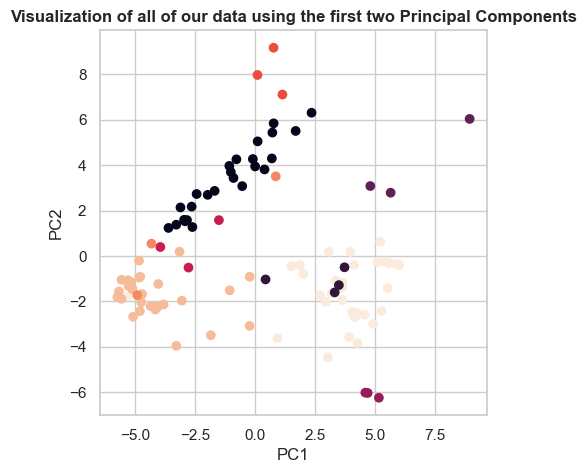

In [49]:
# Visualize the first 2 PCs
font = {'fontname':'Arial', 'weight' : 'bold'}
plt.figure(figsize = (5, 5))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components', **font)
plt.xlabel('PC1')
plt.ylabel('PC2');
plt.show()

In [55]:
plt.rcParams["font.family"] = "Arial"

C:\Users\esnak\AppData\Local\Temp\ipykernel_18988\2500893878.py:8: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  seaborn.scatterplot(x=pcs[:,0],


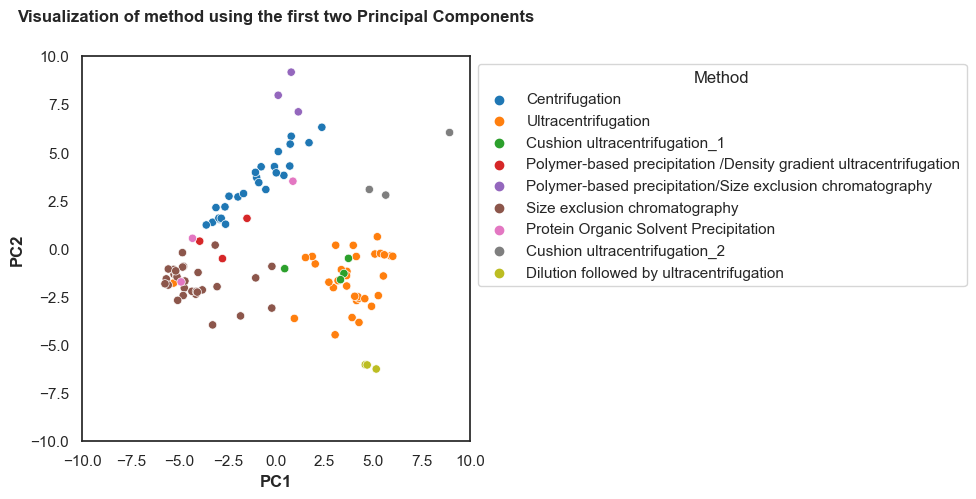

In [65]:
plt.figure(figsize=(5,5))
font = {'fontname':'Arial', 'weight' : 'bold'}
import seaborn as sns
palette = sns.color_palette("tab10")
seaborn.set(style='white')


seaborn.scatterplot(x=pcs[:,0],
                    y=pcs[:,1],
                    data=pcs, hue= names, palette=palette)

plt.legend(bbox_to_anchor=(1,1), title = 'Method')
plt.title('Visualization of method using the first two Principal Components', pad=25, weight='bold')
plt.ylabel('PC2', fontsize = 12, weight='bold')
plt.xlabel('PC1', fontsize = 12, weight='bold')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.savefig("PCA_VESICLES.jpeg", bbox_inches ="tight")
plt.savefig("PCA_VESICLES.pdf", bbox_inches ="tight")
plt.show()